<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/5_Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/Social_Network_Ads.csv')

In [7]:
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
60,15814004,Male,27,20000,0
238,15617877,Female,46,82000,0


In [8]:
df.drop(columns=['User ID'],inplace=True)

In [9]:
df.sample(1)

,Gender,Age,EstimatedSalary,Purchased
68,Female,22,63000,0


In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)

In [11]:
df[ohe.get_feature_names_out(['Gender'])] = pd.DataFrame(
    ohe.fit_transform(df[['Gender']]),
    columns=ohe.get_feature_names_out(['Gender']),
    index=df.index
)


In [12]:
ohe.get_feature_names_out()

array(['Gender_Male'], dtype=object)

In [13]:
df.sample(1)

,Gender,Age,EstimatedSalary,Purchased,Gender_Male
88,Male,26,81000,0,1.0


In [14]:
df.drop(columns=['Gender'],inplace=True)

In [15]:
df.sample(1)

,Age,EstimatedSalary,Purchased,Gender_Male
363,42,79000,0,0.0


In [16]:
X=df.drop(columns=['Purchased'])
y=df['Purchased']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [19]:
X_train.sample(1)

,Age,EstimatedSalary,Gender_Male
28,29,43000,1.0


In [20]:
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [21]:
X_train_scaled.shape

(320, 3)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(X_train_scaled,y_train,batch_size=1,epochs=30)

Epoch 1/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6032 - loss: 0.6453
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.5008  
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8781 - loss: 0.3799
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8811 - loss: 0.3238
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8670 - loss: 0.2938
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2744
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.2956
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9355 - loss: 0.2073
Epoch 9/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9180 - loss: 0.2302
Epoch 10/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.2223
Epoch 11/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.2460
Epoch 12/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

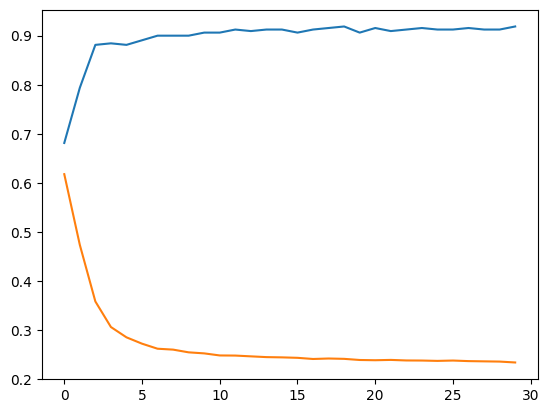

In [28]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['loss'])
plt.show()

In [29]:
model1=Sequential()
model1.add(Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history1=model1.fit(X_train_scaled,y_train,batch_size=32,epochs=30,validation_split=0.2,verbose=2)

Epoch 1/30
8/8 - 1s - 106ms/step - accuracy: 0.5977 - loss: 0.7006 - val_accuracy: 0.6719 - val_loss: 0.6668
Epoch 2/30
8/8 - 0s - 8ms/step - accuracy: 0.6602 - loss: 0.6789 - val_accuracy: 0.7031 - val_loss: 0.6439
Epoch 3/30
8/8 - 0s - 8ms/step - accuracy: 0.7070 - loss: 0.6597 - val_accuracy: 0.7188 - val_loss: 0.6224
Epoch 4/30
8/8 - 0s - 7ms/step - accuracy: 0.7188 - loss: 0.6406 - val_accuracy: 0.7188 - val_loss: 0.6032
Epoch 5/30
8/8 - 0s - 7ms/step - accuracy: 0.7188 - loss: 0.6220 - val_accuracy: 0.7188 - val_loss: 0.5862
Epoch 6/30
8/8 - 0s - 18ms/step - accuracy: 0.7188 - loss: 0.6060 - val_accuracy: 0.7188 - val_loss: 0.5700
Epoch 7/30
8/8 - 0s - 8ms/step - accuracy: 0.7188 - loss: 0.5902 - val_accuracy: 0.7500 - val_loss: 0.5548
Epoch 8/30
8/8 - 0s - 8ms/step - accuracy: 0.7227 - loss: 0.5752 - val_accuracy: 0.7500 - val_loss: 0.5404
Epoch 9/30
8/8 - 0s - 8ms/step - accuracy: 0.7305 - loss: 0.5608 - val_accuracy: 0.7812 - val_loss: 0.5268
Epoch 10/30
8/8 - 0s - 8ms/step - 

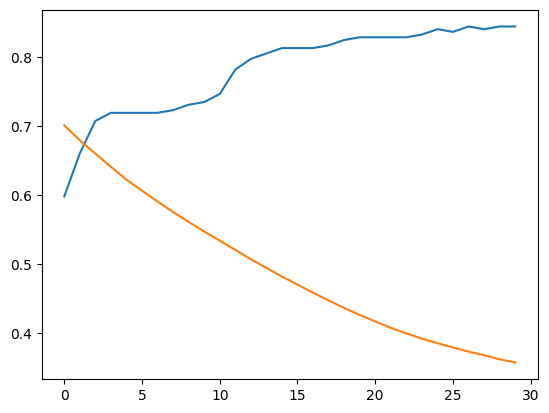

In [33]:
sns.lineplot(history1.history['accuracy'])
sns.lineplot(history1.history['loss'])
plt.show()

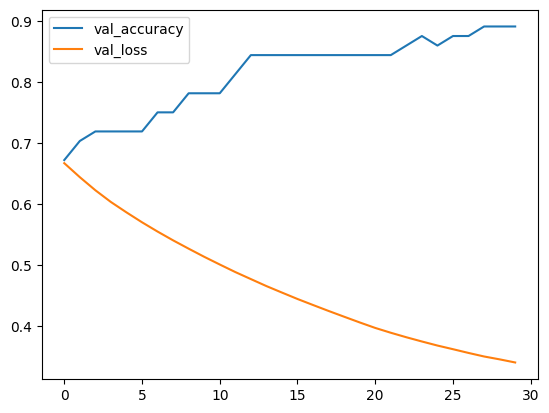

In [34]:
sns.lineplot(history1.history['val_accuracy'],label='val_accuracy')
sns.lineplot(history1.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

In [39]:
y_prd=model1.predict(X_test_scaled).argmax(axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [40]:
accuracy_score(y_prd,y_test)

0.65